# Construct Social Links of Users

by Nan BAI

In [1]:
import json
import pandas as pd
import numpy as np
from argparse import Namespace
from collections import Counter
import pickle
import os
import urllib
import flickrapi

import json

args = Namespace(
    # Data and Path information
    api_key = u'9e32e17383e134335b5cabf2eb186b7a',
    api_secret = u'781aa9cac0a656c9',
    radius = 5,
    save_dir = 'data_storage/',
    tags = None,
    len_grid = 1,
    image_dir = 'data_storage/images/'
    #tags = 'landscape,urban,heritage,culture,building,architecture,park,street'
)

In [91]:
size_df = pd.read_csv('Amsterdam/data_storage/metadata.csv',sep='\t').rename(columns={'Unnamed: 0':'index'})

In [110]:
size_df = pd.read_csv('Suzhou/data_storage/metadata.csv',sep='\t').rename(columns={'Unnamed: 0':'index'})

In [2]:
size_df = pd.read_csv('Venezia/data_storage/metadata.csv',sep='\t').rename(columns={'Unnamed: 0':'index'})

In [130]:
size_df = pd.read_csv('data_storage/images/metadata.csv',sep='\t').rename(columns={'Unnamed: 0':'index'})

In [131]:
owners = size_df['owner'].unique()

In [132]:
len(owners)

6077

In [250]:
flickr = flickrapi.FlickrAPI(args.api_key, args.api_secret, format='json')
contacts = {}
groups = {}

In [251]:
for owner in owners:
    if not owner in contacts:
        try:
            contact_json = flickr.contacts.getPublicList(user_id=owner)
            group_json = flickr.people.getPublicGroups(user_id=owner)

            contacts[owner] = json.loads(contact_json.decode('utf-8'))['contacts']['contact']
            groups[owner] = json.loads(group_json.decode('utf-8'))['groups']['group']
        except Exception as e:
            print(e)
            continue
    if len(contacts)%10==1:
        print('{}/{} collections finished'.format(len(contacts),len(owners)))

1/95 collections finished
'contact'
11/95 collections finished
'contact'
'contact'
21/95 collections finished
'contact'
31/95 collections finished
'contact'
41/95 collections finished
'contact'
'contact'
51/95 collections finished
61/95 collections finished
'contact'
'contact'
'contact'
'contact'
71/95 collections finished
'contact'
81/95 collections finished


In [252]:
len(contacts)

83

In [253]:
len(groups)

83

In [151]:
contacts[owners[0]][0]

{'nsid': '88562734@N00',
 'username': '! / dino olivieri /',
 'iconserver': '7831',
 'iconfarm': 8,
 'ignored': 0,
 'rev_ignored': 0}

In [152]:
groups[owners[0]][0]

{'nsid': '3191023@N20',
 'name': '!           Fotografiando con Elena y Ricardo.',
 'iconfarm': 66,
 'iconserver': '65535',
 'admin': False,
 'eighteenplus': 0,
 'invitation_only': 0,
 'members': '1404',
 'pool_count': '194256'}

In [254]:
contact_pair = [(owner,contact['nsid']) for owner in contacts for contact in contacts[owner]]

In [255]:
group_pair = [(owner,group['nsid'],group['name'],group['eighteenplus'],group['members'],group['pool_count']) for owner in groups for group in groups[owner]]

In [256]:
len(set([owner for owner in groups for group in groups[owner]]))

70

In [257]:
len(set([owner for owner in groups]))

83

In [242]:
len(set([owner for owner in groups]).difference(set([owner for owner in groups for group in groups[owner]])))

17

In [243]:
groups[list(set([owner for owner in groups]).difference(set([owner for owner in groups for group in groups[owner]])))[-1]]

[]

In [209]:
len([groups[owner] for owner in groups for group in groups[owner]])

68971

In [191]:
len(contact_pair)

92158

In [192]:
len(group_pair)

68971

In [258]:
contact_df = pd.DataFrame(contact_pair)
contact_df

,0,1
0,57210421@N04,38162415@N07
1,57210421@N04,50621563@N02
2,57210421@N04,39723413@N06
3,57210421@N04,40340253@N03
4,57210421@N04,8569584@N08
...,...,...
9303,15047208@N00,42271181@N02
9304,15047208@N00,41062051@N00
9305,15047208@N00,31837011@N00
9306,15047208@N00,11900545@N02


In [245]:
len(contact_df[0].unique())

191

In [195]:
contact_df['inside'] = contact_df.apply(lambda x: x[1] in owners, axis=1)

In [196]:
friendship = contact_df[contact_df['inside']].rename(columns={0:'Source',1:'Target'})
friendship

,Source,Target,inside
64,47954272@N06,53400673@N08,True
186,64148082@N02,88380809@N07,True
218,64148082@N02,72647602@N04,True
234,64148082@N02,96099495@N05,True
339,186704588@N07,37472264@N04,True
...,...,...,...
91576,127547040@N07,53400673@N08,True
91802,87413031@N03,33650137@N05,True
91856,112273443@N02,145895983@N08,True
91894,112273443@N02,123016824@N05,True


In [197]:
len(friendship['Source'].unique())

135

In [160]:
interest = pd.DataFrame(group_pair).rename(columns={0:'Source',1:'Target',2:'Group_Name',3:'18+',4:'Members',5:'Pool_Counts'})
interest

,Source,Target,Group_Name,18+,Members,Pool_Counts
0,148125504@N04,3191023@N20,! Fotografiando con Elena y Ricardo.,0,1404,194256
1,148125504@N04,1183996@N23,! ! ! CÁNTABROS Y CANTABRIA¡ ¡ ¡,0,1369,44966
2,148125504@N04,1167706@N24,! !^A Little Bit of Soap Level 1,0,2762,90985
3,148125504@N04,2759861@N21,! !^A Little Bit of Soap Level 2,0,1307,21229
4,148125504@N04,2769605@N21,! !^A Little Bit of Soap Level 3,0,994,11667
...,...,...,...,...,...,...
583867,48150664@N07,10758046@N00,~ PENTAX Cameras ~,0,8548,773628
583868,48150664@N07,64788317@N00,~*~Atmosphere~*~,0,11480,549670
583869,48150664@N07,83292375@N00,α - Sony Alpha Cameras,0,24637,1245522
583870,48150664@N07,1389174@N21,≈ monochrome ≈,0,21773,926884


In [201]:
len(interest['Source'].unique())

293

In [246]:
contact_df.to_csv('Amsterdam/data_storage/contacts.csv',sep='\t')

In [118]:
friendship.to_csv('Amsterdam/data_storage/friendship.csv',sep='\t')
interest.to_csv('Amsterdam/data_storage/interest.csv',sep='\t')

In [259]:
contact_df.to_csv('Suzhou/data_storage/contacts.csv',sep='\t')

In [131]:
friendship.to_csv('Suzhou/data_storage/friendship.csv',sep='\t')
interest.to_csv('Suzhou/data_storage/interest.csv',sep='\t')

In [198]:
contact_df.to_csv('Venezia/data_storage/contacts.csv',sep='\t')
friendship.to_csv('Venezia/data_storage/friendship.csv',sep='\t')
interest.to_csv('Venezia/data_storage/interest.csv',sep='\t')

In [161]:
contact_df.to_csv('data_storage/images/contacts.csv',sep='\t')
friendship.to_csv('data_storage/images/friendship.csv',sep='\t')
interest.to_csv('data_storage/images/interest.csv',sep='\t')

In [200]:
friendship

,Source,Target,inside
0,47954272@N06,53400673@N08,True
1,64148082@N02,88380809@N07,True
2,64148082@N02,72647602@N04,True
3,64148082@N02,96099495@N05,True
4,186704588@N07,37472264@N04,True
...,...,...,...
368,127547040@N07,53400673@N08,True
369,87413031@N03,33650137@N05,True
370,112273443@N02,145895983@N08,True
371,112273443@N02,123016824@N05,True


In [5]:
contact_df = pd.read_csv('Venezia/data_storage/contacts.csv',sep='\t').drop('Unnamed: 0',axis=1)
interest = pd.read_csv('Venezia/data_storage/interest.csv',sep='\t').drop('Unnamed: 0',axis=1)
friendship = pd.read_csv('Venezia/data_storage/friendship.csv',sep='\t').drop('Unnamed: 0',axis=1)

In [94]:
contact_df = pd.read_csv('Amsterdam/data_storage/contacts.csv',sep='\t').drop('Unnamed: 0',axis=1)
interest = pd.read_csv('Amsterdam/data_storage/interest.csv',sep='\t').drop('Unnamed: 0',axis=1)
friendship = pd.read_csv('Amsterdam/data_storage/friendship.csv',sep='\t').drop('Unnamed: 0',axis=1)

In [113]:
contact_df = pd.read_csv('Suzhou/data_storage/contacts.csv',sep='\t').drop('Unnamed: 0',axis=1)
interest = pd.read_csv('Suzhou/data_storage/interest.csv',sep='\t').drop('Unnamed: 0',axis=1)
friendship = pd.read_csv('Suzhou/data_storage/friendship.csv',sep='\t').drop('Unnamed: 0',axis=1)

In [133]:
contact_df = pd.read_csv('data_storage/images/contacts.csv',sep='\t').drop('Unnamed: 0',axis=1)
interest = pd.read_csv('data_storage/images/interest.csv',sep='\t').drop('Unnamed: 0',axis=1)
friendship = pd.read_csv('data_storage/images/friendship.csv',sep='\t').drop('Unnamed: 0',axis=1)

In [134]:
contact_df

,0,1,inside
0,148125504@N04,88562734@N00,False
1,148125504@N04,140284390@N04,False
2,148125504@N04,28132554@N00,True
3,148125504@N04,155663969@N02,False
4,148125504@N04,131256966@N08,False
...,...,...,...
894716,48150664@N07,59649937@N05,False
894717,48150664@N07,64497386@N02,False
894718,48150664@N07,121585339@N03,False
894719,48150664@N07,101974306@N08,False


In [135]:
len(interest['Target'].unique()),len(interest['Group_Name'].unique())

(117908, 117883)

In [136]:
len(interest['Source'].unique()),len(friendship['Source'].unique()),len(contact_df['0'].unique())

(4883, 2454, 5627)

In [137]:
len(owners)

6077

In [10]:
import networkx as nx

In [138]:
G1 = nx.from_pandas_edgelist(friendship, source='Source',target='Target')
G2 = nx.from_pandas_edgelist(interest, source='Source',target='Target')

In [139]:
len(G1.edges()),len(G3.edges())

(8526, 809)

In [140]:
G3 = nx.bipartite.overlap_weighted_projected_graph(G2, interest['Source'].unique())

In [121]:
nx.to_pandas_edgelist(G1)

,source,target
0,128337749@N02,28571579@N03


In [122]:
nx.to_pandas_edgelist(G3)

,source,target,weight
0,57210421@N04,117372933@N07,0.058824
1,57210421@N04,63829447@N04,0.028571
2,57210421@N04,13325044@N05,0.066667
3,57210421@N04,98402793@N00,0.007407
4,57210421@N04,50658691@N04,0.500000
...,...,...,...
804,98489626@N02,95645163@N00,0.014493
805,95645163@N00,79721788@N00,0.023585
806,95645163@N00,145351882@N07,0.012195
807,95645163@N00,91698536@N04,0.014925


In [178]:
interest.groupby('Source').count()

,Target,Group_Name,18+,Members,Pool_Counts
Source,,,,,
10028574@N02,123,123,123,123,123
100629421@N07,217,217,217,217,217
10101620@N07,17,17,17,17,17
10419801@N06,3,3,3,3,3
10471762@N02,3,3,3,3,3
...,...,...,...,...,...
97904844@N08,64,64,64,64,64
98508400@N04,398,398,398,398,398
98649929@N04,131,131,131,131,131


In [36]:
s = '64148082@N02'
t = '72647602@N04'

In [50]:
G3.edges[(s,t)]['weight']

0.09836065573770492

In [141]:
social_dict = {}
for s in owners:
    for t in owners:
        social_dict[(s,t)] = {}
        if s==t:
            social_dict[(s,t)]['self'] = 1
            social_dict[(s,t)]['friend'] = 1
            social_dict[(s,t)]['interest'] = 1
        else:
            social_dict[(s,t)]['self'] = 0
            social_dict[(s,t)]['friend'] = (s,t) in G1.edges()
            if (s,t) in G3.edges():
                social_dict[(s,t)]['interest'] = G3.edges[(s,t)]['weight']
            else:
                social_dict[(s,t)]['interest'] = 0

In [142]:
social_df = pd.DataFrame(social_dict).T

<AxesSubplot:>

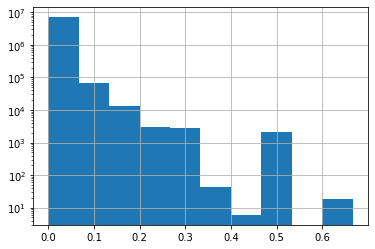

In [148]:
social_df[social_df.interest>0].loc[social_df.interest<1]['interest'].hist(log=True)

In [146]:
social_df[social_df.interest>0.1].loc[social_df.interest<1]

self friend  interest  mutual
148125504@N04 30996501@N07     0  False  0.100789    True
              103963823@N07    0  False  0.113518    True
              131220333@N05    0  False  0.165109    True
              38795342@N06     0  False  0.101571    True
              130345501@N04    0   True  0.103535    True
...                          ...    ...       ...     ...
48150664@N07  134836250@N02    0   True  0.135729    True
              121844793@N05    0  False  0.123953    True
              116860703@N02    0  False  0.101227    True
              130365893@N05    0  False  0.102041    True
              127641458@N06    0  False  0.118987    True

[35320 rows x 4 columns]

In [144]:
social_df['mutual'] = social_df['interest'] > 0.1

In [145]:
social_df

self friend  interest  mutual
148125504@N04 148125504@N04    1      1         1    True
              32980384@N05     0  False  0.004769   False
              96038677@N06     0  False         0   False
              88380809@N07     0  False  0.012162   False
              138486769@N02    0  False  0.033613   False
...                          ...    ...       ...     ...
48150664@N07  46856873@N05     0  False  0.087719   False
              142199786@N05    0  False         0   False
              132571827@N06    0  False  0.047859   False
              29127542@N04     0  False         0   False
              48150664@N07     1      1         1    True

[36929929 rows x 4 columns]

In [90]:
social_df.to_csv('Venezia/data_storage/social_links.csv',sep='\t')

In [109]:
social_df.to_csv('Amsterdam/data_storage/social_links.csv',sep='\t')

In [129]:
social_df.to_csv('Suzhou/data_storage/social_links.csv',sep='\t')

In [147]:
social_df.to_csv('data_storage/images/social_links.csv',sep='\t')